In [35]:
#Importing Packages and reading the file
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('/content/bank-full.csv',sep=";")

In [38]:
#Trying to see if data was loaded properly
print(data.head())

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


In [39]:
#Checking the rows and columns in the dataframe
print(data.shape)

(45211, 17)


In [40]:
#Checking datatypes of each column
print(data.dtypes)

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object


# Below code tells us that there are no missing values and that the data is fit to proceed with as it is for now.

In [41]:
print(data.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [42]:
print(data.duplicated().sum())

0


# Overall data spread check

age            Axes(0.125,0.53;0.168478x0.35)
balance     Axes(0.327174,0.53;0.168478x0.35)
day         Axes(0.529348,0.53;0.168478x0.35)
duration    Axes(0.731522,0.53;0.168478x0.35)
campaign       Axes(0.125,0.11;0.168478x0.35)
pdays       Axes(0.327174,0.11;0.168478x0.35)
previous    Axes(0.529348,0.11;0.168478x0.35)
dtype: object

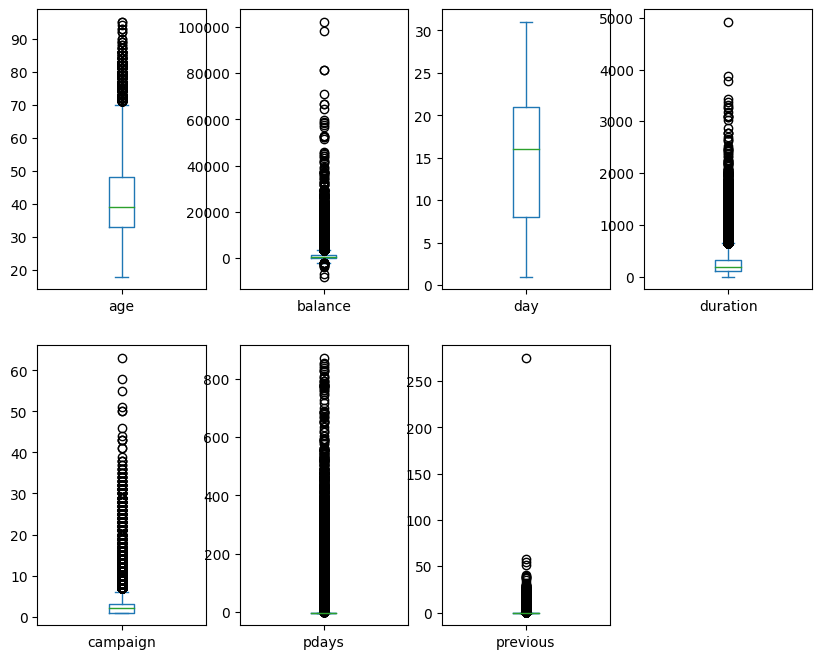

In [43]:
data[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']].plot(kind='box', subplots=True, layout=(2,4), figsize=(10,8))

In [44]:
#Getting a better idea of how spread the data is.
print(data.describe())

                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.

# Count of Desposits Made

Axes(0.125,0.11;0.775x0.77)


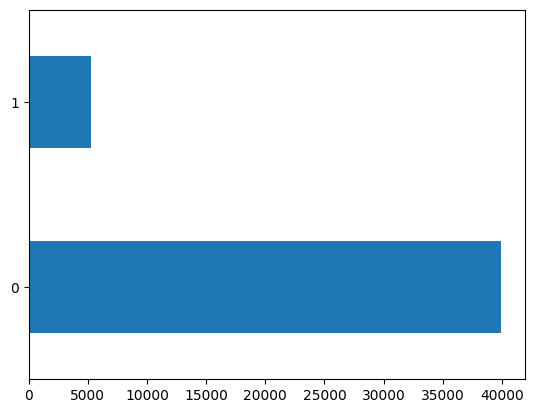

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'yes' and 'no' to 1 and 0
data['y'] = data['y'].replace({'yes': 1, 'no': 0})

# Plot countplot of 'y' column
print(data['y'].value_counts().plot(kind='barh'))

# Check Correlation b/w variables

<ipython-input-46-7465faa38b37>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


<Axes: >

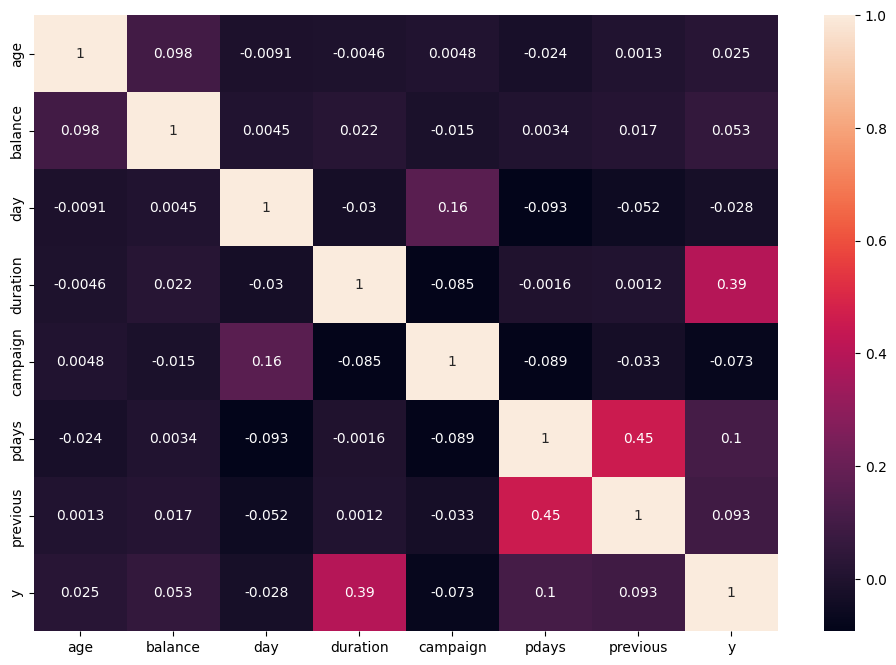

In [46]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True)

# Age spread check

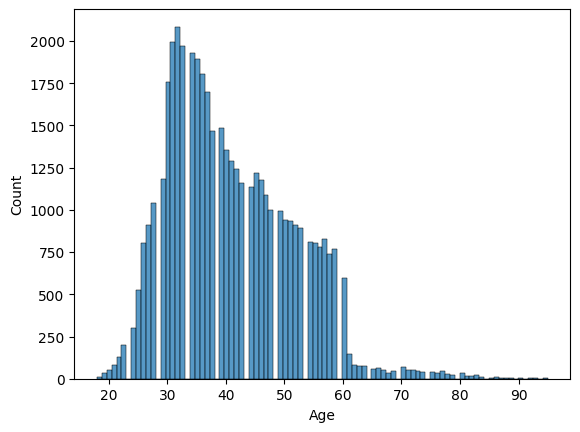

In [ ]:
sns.histplot(data['age'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Cellular was the most successful form of communication

<Axes: title={'center': 'Contact vs Deposit Made'}>

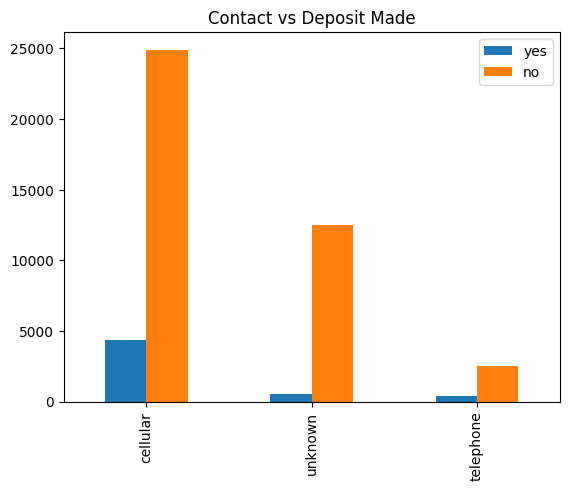

In [ ]:
contact_df = pd.DataFrame()

contact_df['yes'] = data[data['y'] == 'yes']['contact'].value_counts()
contact_df['no'] = data[data['y'] == 'no']['contact'].value_counts()

contact_df.plot.bar(title = 'Contact vs Deposit Made')

#Married Customers Less likely to make a deposit

<Axes: title={'center': 'Marital status vs Deposit Made'}>

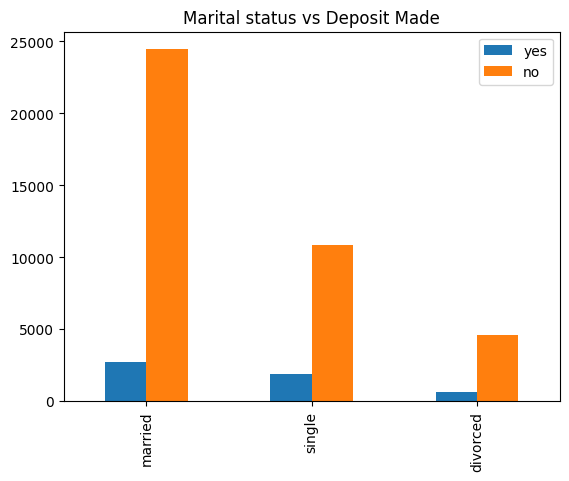

In [ ]:
marital_df = pd.DataFrame()

marital_df['yes'] = data[data['y'] == 'yes']['marital'].value_counts()
marital_df['no'] = data[data['y'] == 'no']['marital'].value_counts()

marital_df.plot.bar(title = 'Marital status vs Deposit Made')

# Deposit is least among blue collar workers

<Axes: title={'center': 'Job vs Deposit Made'}>

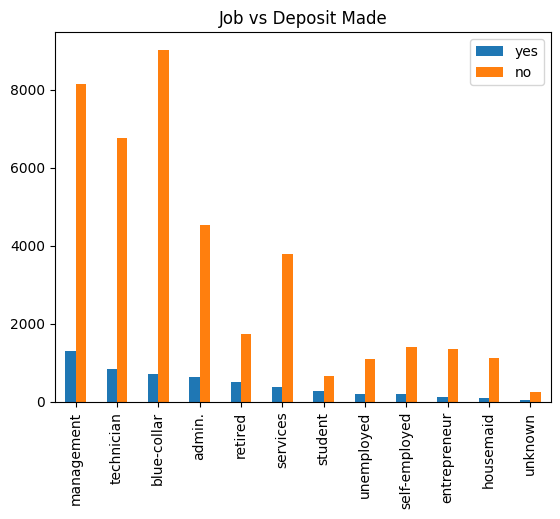

In [ ]:
job_df = pd.DataFrame()

job_df['yes'] = data[data['y'] == 'yes']['job'].value_counts()
job_df['no'] = data[data['y'] == 'no']['job'].value_counts()

job_df.plot.bar(title = 'Job vs Deposit Made')

# People who subscribed have greater age values.

               yes            no
count  5289.000000  39922.000000
mean     41.670070     40.838986
std      13.497781     10.172662
min      18.000000     18.000000
25%      31.000000     33.000000
50%      38.000000     39.000000
75%      50.000000     48.000000
max      95.000000     95.000000


<Axes: title={'center': 'Age and deposit statistics'}>

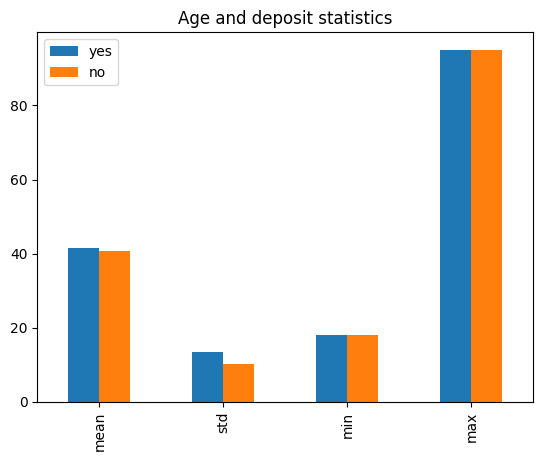

In [ ]:
agewise_df = pd.DataFrame()
agewise_df['yes'] = (data[data['y'] == 'yes'][['y','age']].describe())['age']
agewise_df['no'] = (data[data['y'] == 'no'][['y','age']].describe())['age']

print(agewise_df)

agewise_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Age and deposit statistics')

# Fewer contact yielded more results

       campaign_yes   campaign_no
count   5289.000000  39922.000000
mean       2.141047      2.846350
std        1.921826      3.212767
min        1.000000      1.000000
25%        1.000000      1.000000
50%        2.000000      2.000000
75%        3.000000      3.000000
max       32.000000     63.000000


<Axes: title={'center': 'Campaign and deposit statistics'}>

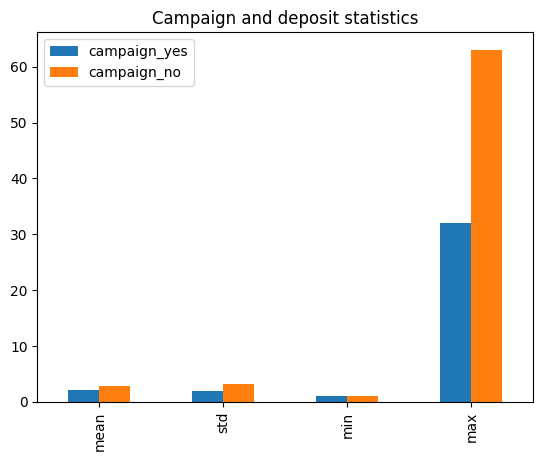

In [ ]:
campaign_frame = pd.DataFrame()
campaign_frame['campaign_yes'] = (data[data['y'] == 'yes'][['y','campaign']].describe())['campaign']
campaign_frame['campaign_no'] = (data[data['y'] == 'no'][['y','campaign']].describe())['campaign']

print(campaign_frame)

campaign_frame.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Campaign and deposit statistics')